In [1]:
import torch
import os
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import pandas as pd

from model.classifier import Net as ClassNet

trained_class = './result/gpu_classification_g3train.pt'
class_model = ClassNet()
class_model.load_state_dict(torch.load(trained_class, map_location=torch.device('cpu')))
class_model.eval()
class_model = class_model.double()

print("Model Loaded")

print("Importing Data")

/tmpscratch/tkim12/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model Loaded
Importing Data


In [25]:
bkgcase_loc = "diff_bkgs/"

# Load background case 1
CMB_bkg1 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case0_ev4.npy")


# Load background case 2
CMB_bkg2 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case1_ev4.npy")
                  

# Load background case 3            
CMB_bkg3 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case2_ev4.npy")
 
            
# Load background case 4           
CMB_bkg4 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case3_ev4.npy")


# Load background case 5           
CMB_bkg5 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case4_ev4.npy")


# Load background case 6           
CMB_bkg6 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case5_ev4.npy")


# Load background case 7          
CMB_bkg7 = np.load(bkgcase_loc+"500_events_90Sqr_lensed_cutBackgroundlmax3500_case6_ev4.npy")

In [26]:
'''CMB_bkg1 = np.array(CMB_bkg1)
CMB_bkg2 = np.array(CMB_bkg2)
CMB_bkg3 = np.array(CMB_bkg3)
CMB_bkg4 = np.array(CMB_bkg4)'''

CMB_bkg1_num = CMB_bkg1.shape[0]


Y_data = np.zeros(CMB_bkg1_num)

wid, hei = CMB_bkg1.shape[1], CMB_bkg1.shape[2]
print(CMB_bkg1.shape[0], wid, hei)


CMB_bkg1 = CMB_bkg1.reshape(CMB_bkg1.shape[0], 1, wid, hei).astype('float64')
CMB_bkg1 = torch.from_numpy(CMB_bkg1)

CMB_bkg2 = CMB_bkg2.reshape(CMB_bkg2.shape[0], 1, wid, hei).astype('float64')
CMB_bkg2 = torch.from_numpy(CMB_bkg2)

CMB_bkg3 = CMB_bkg3.reshape(CMB_bkg3.shape[0], 1, wid, hei).astype('float64')
CMB_bkg3 = torch.from_numpy(CMB_bkg3)

CMB_bkg4 = CMB_bkg4.reshape(CMB_bkg4.shape[0], 1, wid, hei).astype('float64')
CMB_bkg4 = torch.from_numpy(CMB_bkg4)

CMB_bkg5 = CMB_bkg5.reshape(CMB_bkg5.shape[0], 1, wid, hei).astype('float64')
CMB_bkg5 = torch.from_numpy(CMB_bkg5)

CMB_bkg6 = CMB_bkg6.reshape(CMB_bkg6.shape[0], 1, wid, hei).astype('float64')
CMB_bkg6 = torch.from_numpy(CMB_bkg6)

CMB_bkg7 = CMB_bkg7.reshape(CMB_bkg7.shape[0], 1, wid, hei).astype('float64')
CMB_bkg7 = torch.from_numpy(CMB_bkg7)

Y_data = Y_data.reshape(Y_data.shape[0], 1).astype('float64')
Y_data = torch.from_numpy(Y_data)

500 90 90


In [27]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

bkg1_data = TensorDataset(CMB_bkg1, Y_data)
bkg2_data = TensorDataset(CMB_bkg2, Y_data)
bkg3_data = TensorDataset(CMB_bkg3, Y_data)
bkg4_data = TensorDataset(CMB_bkg4, Y_data)
bkg5_data = TensorDataset(CMB_bkg5, Y_data)
bkg6_data = TensorDataset(CMB_bkg6, Y_data)
bkg7_data = TensorDataset(CMB_bkg7, Y_data)


bkg1loader = DataLoader(dataset=bkg1_data, batch_size=1, shuffle=False)
bkg2loader = DataLoader(dataset=bkg2_data, batch_size=1, shuffle=False)
bkg3loader = DataLoader(dataset=bkg3_data, batch_size=1, shuffle=False)
bkg4loader = DataLoader(dataset=bkg4_data, batch_size=1, shuffle=False)
bkg5loader = DataLoader(dataset=bkg5_data, batch_size=1, shuffle=False)
bkg6loader = DataLoader(dataset=bkg6_data, batch_size=1, shuffle=False)
bkg7loader = DataLoader(dataset=bkg7_data, batch_size=1, shuffle=False)

In [28]:
print("Prediction ... ")

bkg1_outputs = []
bkg2_outputs = []
bkg3_outputs = []
bkg4_outputs = []
bkg5_outputs = []
bkg6_outputs = []
bkg7_outputs = []

i=0
print(" Background Case 1 ")
with torch.no_grad():
    for data in bkg1loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg1_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")


i=0
print(" Background Case 2 ")
with torch.no_grad():
    for data in bkg2loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg2_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")


i=0
print(" Background Case 3 ")
with torch.no_grad():
    for data in bkg3loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg3_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")      
            
            
i=0
print(" Background Case 4 ")
with torch.no_grad():
    for data in bkg4loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg4_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")

            
i=0
print(" Background Case 5 ")
with torch.no_grad():
    for data in bkg5loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg5_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")


i=0
print(" Background Case 6 ")
with torch.no_grad():
    for data in bkg6loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg6_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")


i=0
print(" Background Case 7 ")
with torch.no_grad():
    for data in bkg7loader:
        i+=1
        images, y = data
        coutputs = class_model(images)
        
        bkg7_outputs.append(coutputs.detach().numpy())

        if i%100==0:
            print("Event : "+str(i)+" Completed")
print("Prediction done")

Prediction ... 
 Background Case 1 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 2 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 3 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 4 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 5 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 6 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
 Background Case 7 
Event : 100 Completed
Event : 200 Completed
Event : 300 Completed
Event : 400 Completed
Event : 500 Completed
Prediction done


In [29]:
bkg1_outputs = np.concatenate(bkg1_outputs)
bkg2_outputs = np.concatenate(bkg2_outputs)
bkg3_outputs = np.concatenate(bkg3_outputs)
bkg4_outputs = np.concatenate(bkg4_outputs)
bkg5_outputs = np.concatenate(bkg5_outputs)
bkg6_outputs = np.concatenate(bkg6_outputs)
bkg7_outputs = np.concatenate(bkg7_outputs)


#np.save("diff_bkgs/Background_Planck2018_prediction", bkg1_outputs)
#np.save("diff_bkgs/Background_Case1_prediction", bkg2_outputs)
#np.save("diff_bkgs/Background_Case2_prediction", bkg3_outputs)
#np.save("diff_bkgs/Background_Case3_prediction", bkg4_outputs)
#np.save("diff_bkgs/Background_Case4_prediction", bkg5_outputs)
#np.save("diff_bkgs/Background_Case5_prediction", bkg6_outputs)
#np.save("diff_bkgs/Background_Case6_prediction", bkg7_outputs)

In [30]:
case1 = 100*len(bkg1_outputs[bkg1_outputs<0.5])/500
case2 = 100*len(bkg2_outputs[bkg2_outputs<0.5])/500
case3 = 100*len(bkg3_outputs[bkg3_outputs<0.5])/500
case4 = 100*len(bkg4_outputs[bkg4_outputs<0.5])/500
case5 = 100*len(bkg5_outputs[bkg5_outputs<0.5])/500
case6 = 100*len(bkg4_outputs[bkg6_outputs<0.5])/500
case7 = 100*len(bkg5_outputs[bkg7_outputs<0.5])/500

print(case1)
print(case2)
print(case3)
print(case4)
print(case5)
print(case6)
print(case7)

79.0
80.8
99.8
100.0
100.0
99.8
99.2


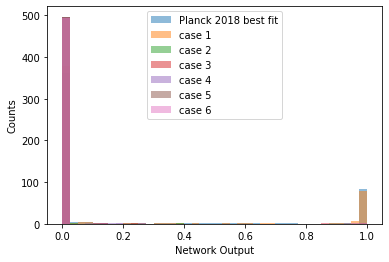

In [31]:
import matplotlib.pyplot as plt

bins=[0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.60, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]

kwargs = dict(alpha=0.5, bins=bins)

plt.hist(bkg1_outputs,**kwargs,label="Planck 2018 best fit")
plt.hist(bkg2_outputs,**kwargs,label="case 1")
plt.hist(bkg3_outputs,**kwargs,label=r"case 2")
plt.hist(bkg4_outputs,**kwargs,label=r'case 3')
plt.hist(bkg5_outputs,**kwargs,label=r'case 4')
plt.hist(bkg6_outputs,**kwargs,label=r'case 5')
plt.hist(bkg7_outputs,**kwargs,label=r'case 6')

#plt.figtext(.65, .3, 'Original Values \n $\Omega_b h^2 = 0.022032$ \n $\Omega_{cdm} h^2 = 0.12038$\n'+r'$A_{s} = 2.215\times 10^{-9}$')

#plt.figtext(.6, .3, f'Background rejection \n Planck 2018 = {case1:.1f} % \n case 1 = {case2:.1f} % \n case 2 = {case3:.1f} % \n case 3 = {case4:.1f} %\n case 4 = {case5:.1f} %')

plt.xlabel("Network Output")
plt.ylabel("Counts")
plt.legend(loc='upper center')
#plt.savefig("diff_bkgs/Case_dep_background.pdf")

In [9]:
bkg1_outputs[bkg1_outputs>0.5]

array([], dtype=float64)

In [10]:
bkg2_outputs[bkg2_outputs>0.5]

array([0.98980741, 1.        ])

In [11]:
bkg3_outputs[bkg3_outputs>0.5]

array([1.        , 0.92281021, 0.71630228, 0.99113916, 1.        ])

In [12]:
len(bkg4_outputs[bkg4_outputs>0.5])/len(bkg4_outputs)*100

92.0